In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv("D:/project2/superstore.csv",encoding = 'unicode_escape')
data.shape

(51290, 24)

In [4]:
data.iloc[:5,:15]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447


In [3]:
data.Region.unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'East', 'Caribbean'], dtype=object)

In [4]:
data.iloc[:5,15:]

,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [5]:
data["Order Priority"].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

## Doing EDA- 
    1. Univariant analysis- 
    
    >Qualitative features- Ship mode, Segment,City,State,Country,Market,Region,Category,Sub-Category,Order Priority.
    >Quantitative features- Dsicount,Profit,Shipping cost,Sales
    
    

#### Qualitative Analysis---------------------------------------------------------------------------------------------------------------------

## ------------------------------------------------------------------------------------------------------------------

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null object
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping C

In [11]:
data["Order Date"] = pd.to_datetime(data["Order Date"])


In [15]:
print(data["Order Date"].min())
print(data["Order Date"].max())
print("no of months of data", (data["Order Date"].max()-data["Order Date"].min()))   ## around 4 years of data

2011-01-01 00:00:00
2014-12-31 00:00:00
no of months of data 1460 days 00:00:00


In [29]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [22]:
df = data[["Order Date","Sales"]]

In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'].head()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: Order Date, dtype: datetime64[ns]

In [25]:
df.set_index("Order Date", inplace=True)

In [27]:
df.head()
df.index

DatetimeIndex(['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01', '2011-01-02', '2011-01-02',
               '2011-01-02', '2011-01-02',
               ...
               '2014-12-31', '2014-12-31', '2014-12-31', '2014-12-31',
               '2014-12-31', '2014-12-31', '2014-12-31', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=51290, freq=None)

In [28]:
ts=df["Sales"]
ts.head()


Order Date
2011-01-01    408.300
2011-01-01    120.366
2011-01-01     66.120
2011-01-01     44.865
2011-01-01    113.670
Name: Sales, dtype: float64

In [15]:
from datetime import datetime

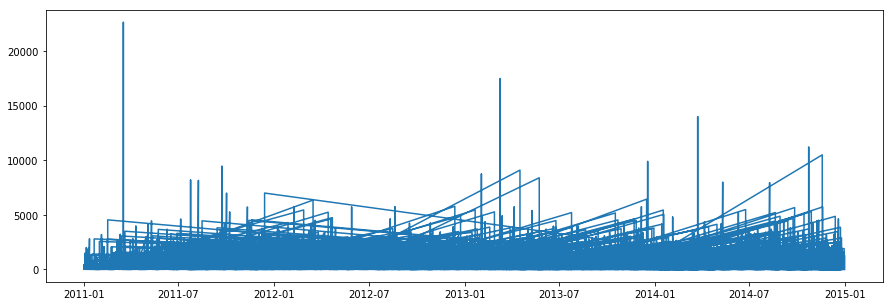

In [30]:
plt.figure(figsize=(15,5))
plt.plot(ts)

In [31]:
## trying to grouping data of every month- 

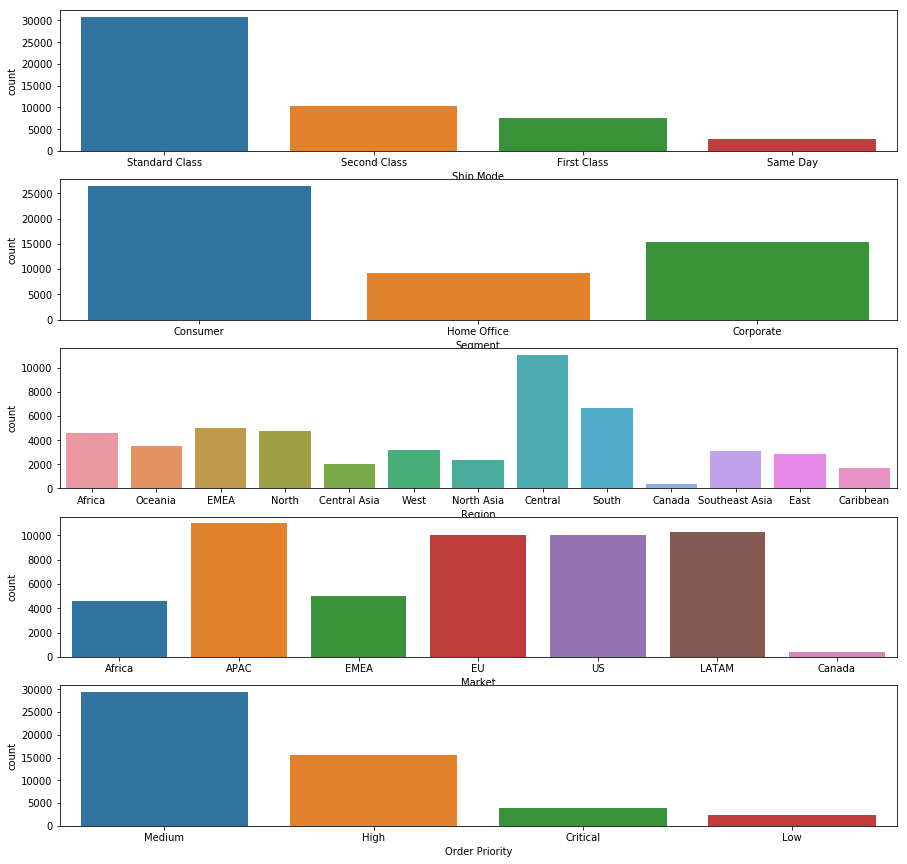

In [802]:

fig, ax= plt.subplots(5,1,figsize=(15,15))
sns.countplot(x="Ship Mode",data=data,ax=ax[0])
sns.countplot(x="Segment",data=data,ax=ax[1])
sns.countplot(x="Region", data=data,ax=ax[2])
sns.countplot(x="Market", data=data,ax=ax[3])
sns.countplot(x="Order Priority", data=data,ax=ax[4])
plt.show()



In [803]:
## Finding top 5 Regions where maximum orders come from - 

df=data.groupby("Region")["Row ID"].count().sort_values(ascending=False).head().reset_index()
Regions=list(df.Region)

In [804]:
# Finding top 5 countries of each of these 5 Regions- 
d=pd.DataFrame()
for i in Regions:
    d=d.append(pd.DataFrame(data[data["Region"]==i].groupby(["Region","Country"])["Row ID"].count().sort_values(ascending=False).head()))

In [805]:
# data[data["Region"]=="Central"].groupby(["Region","Country"])["Row ID"].count().sort_values(ascending=False).head()

In [806]:
d.reset_index(inplace=True)

In [807]:
d

,Region,Country,Row ID
0,Central,France,2827
1,Central,United States,2323
2,Central,Germany,2065
3,Central,El Salvador,736
4,Central,Honduras,713
5,South,United States,1620
6,South,Brazil,1599
7,South,Italy,1108
8,South,Spain,859
9,South,Argentina,390


In [808]:
## Plot of top 5 ordering countries of top 5 Regions---

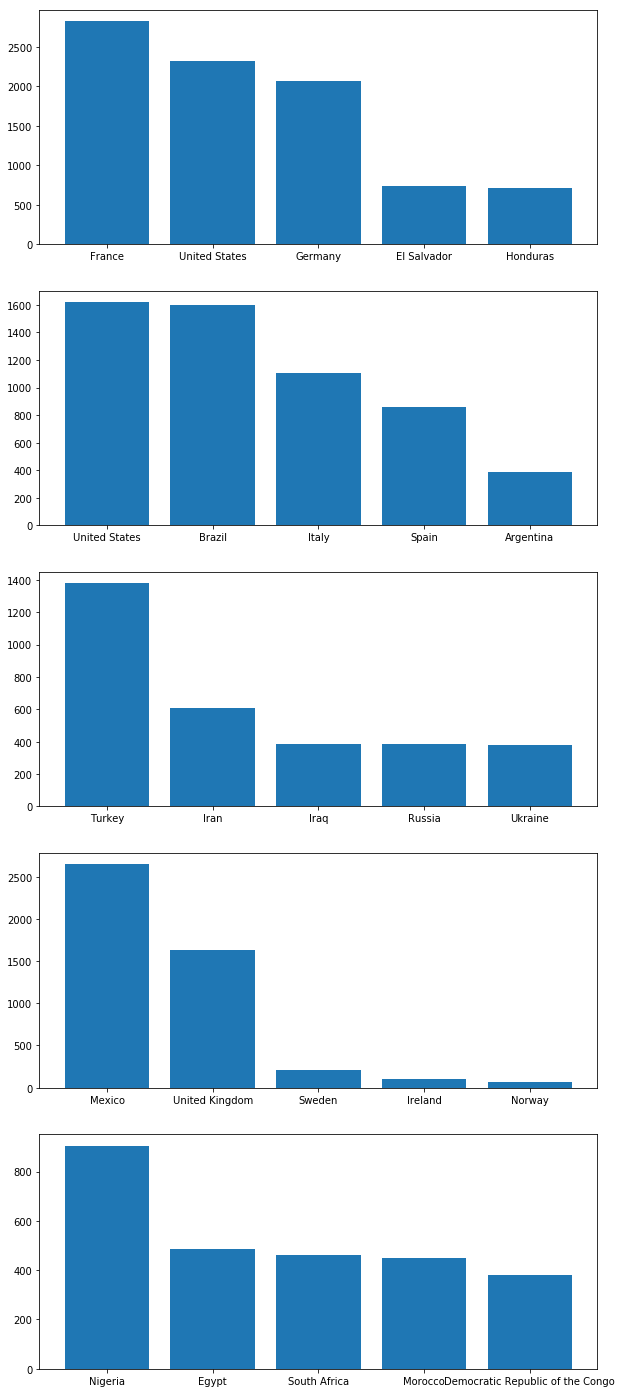

In [809]:

fig,ax=plt.subplots(5,1, figsize=(10,25))
for i in range(0,len(Regions)):
    ax[i].bar(x=d[d.Region==Regions[i]]["Country"], height=d[d.Region==Regions[i]]["Row ID"])    
plt.show()
    

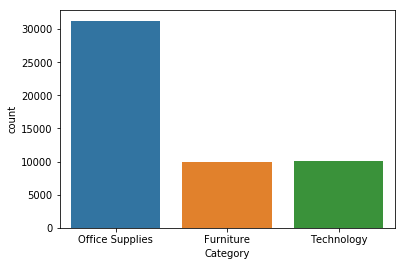

In [810]:
### Looking at the Categories data- 
sns.countplot(x="Category", data=data)
# sns.countplot(x="Sub-Category", data=data,ax=ax[5])

In [811]:
pd.DataFrame(data.groupby(["Category","Sub-Category"])["Row ID"].count().reset_index())

,Category,Sub-Category,Row ID
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


In [812]:
data["Category"].unique()[0]

'Office Supplies'

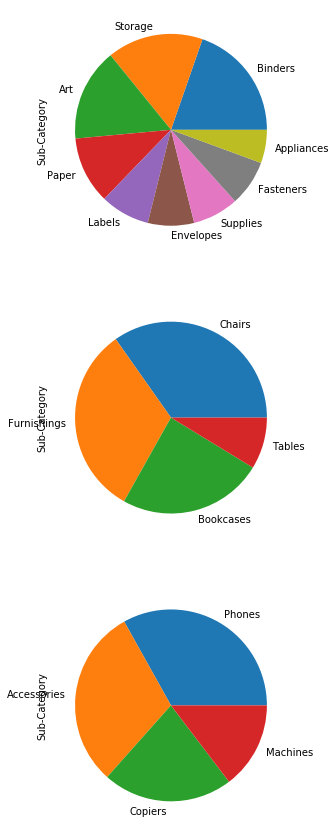

In [813]:
fig,ax = plt.subplots(3,1,figsize=(20,15))
for i in range(0,data["Category"].unique().size):
    data[data["Category"]==data["Category"].unique()[i]]["Sub-Category"].value_counts().plot.pie(ax=ax[i])
plt.show()




### Quantitative Analysis---------------------------------------------------------------------------------------

In [814]:
data.iloc[:5,:15]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447


In [815]:
data.iloc[:5,15:]

,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [816]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570


In [817]:
data.shape

(51290, 24)

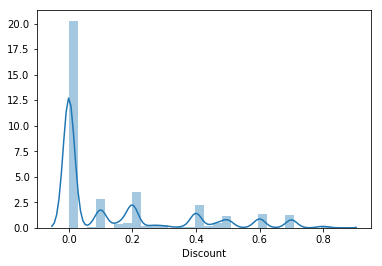

In [818]:
sns.distplot(a=data["Discount"], bins=30)

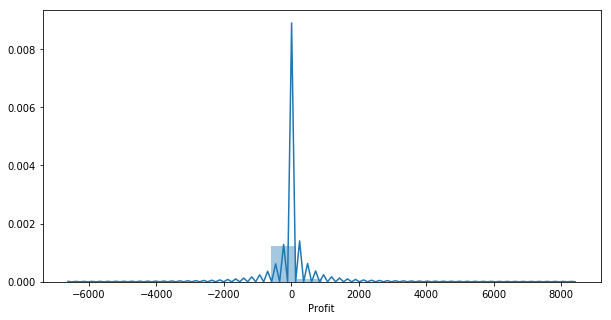

In [819]:
plt.figure(figsize=(10,5))
sns.distplot(a=data["Profit"], bins=20)

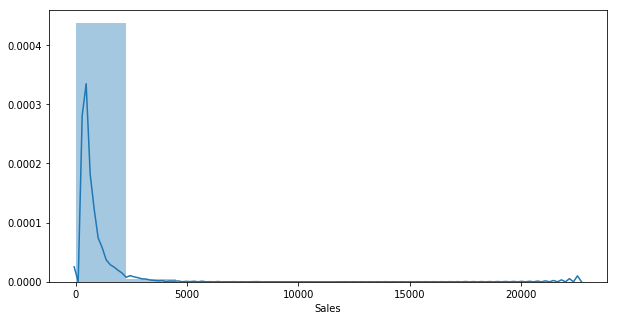

In [820]:
plt.figure(figsize=(10,5))
sns.distplot(a=data["Sales"], bins=10)

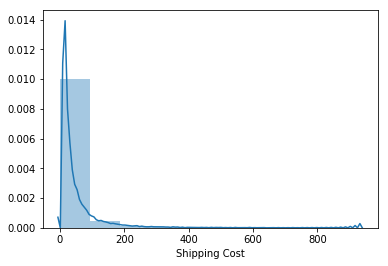

In [821]:
sns.distplot(a=data["Shipping Cost"], bins=10)

## Bi-Variate analysis--------------------------------------------------

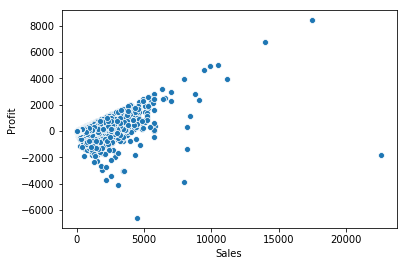

In [822]:
sns.scatterplot(x="Sales",y="Profit", data=data)

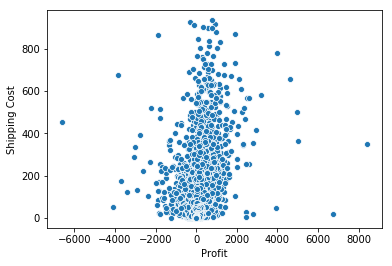

In [823]:
sns.scatterplot(x="Profit",y="Shipping Cost", data=data)

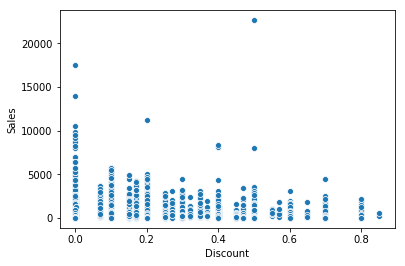

In [824]:
sns.scatterplot(y="Sales",x="Discount", data=data)

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


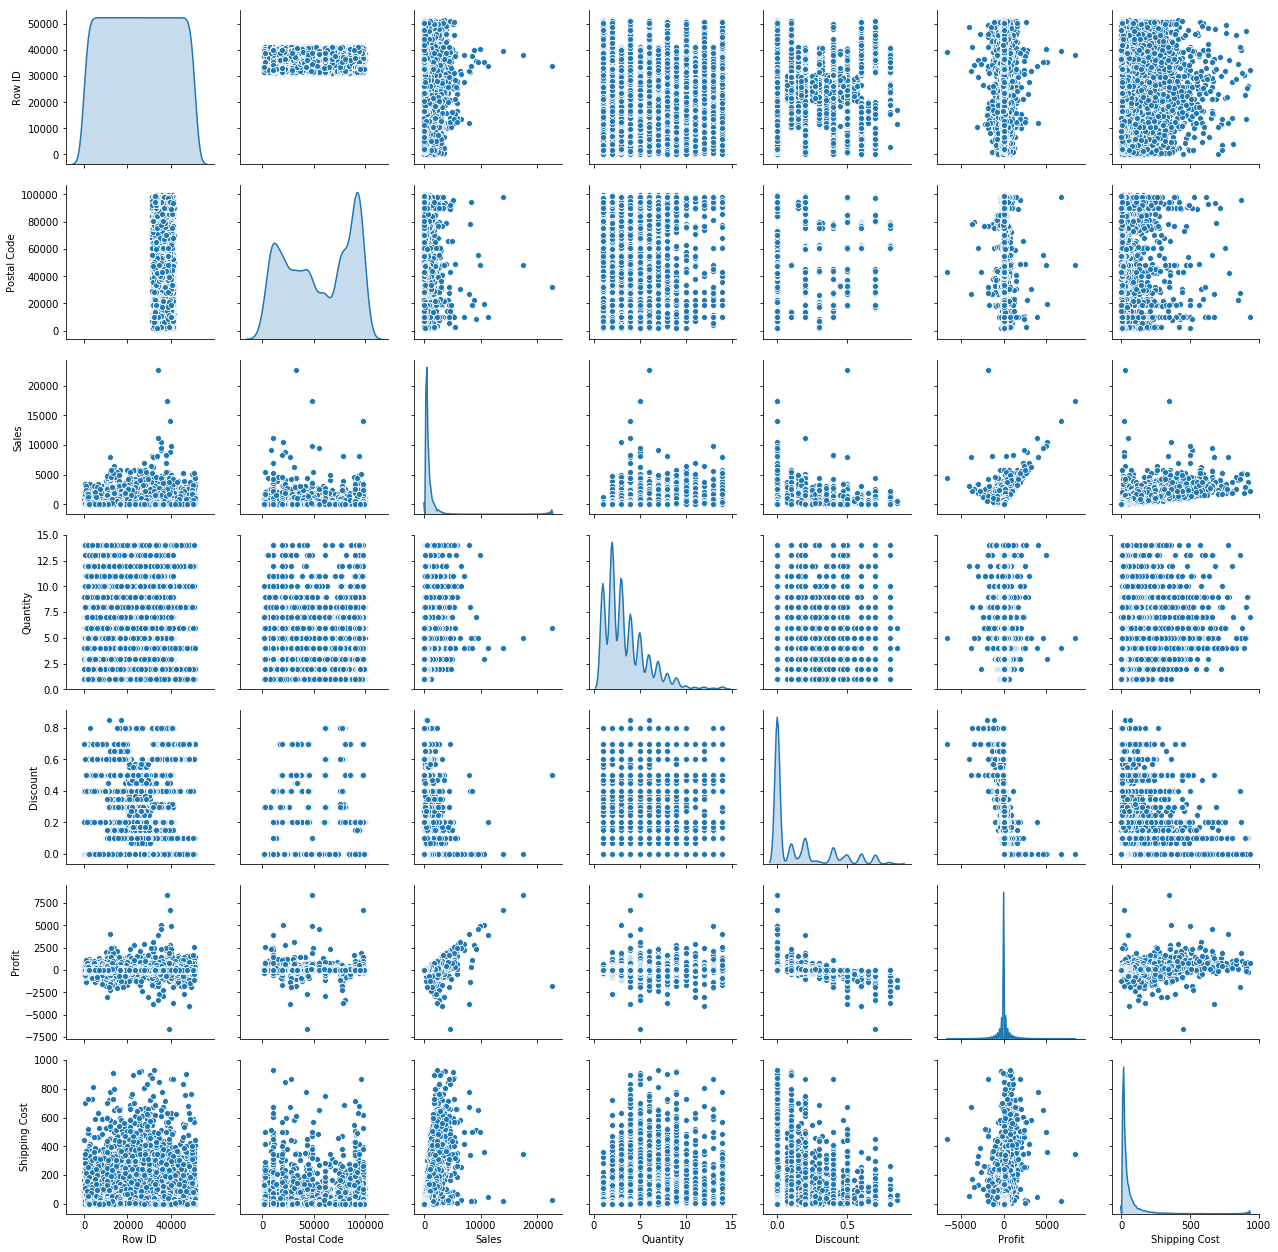

In [16]:
sns.pairplot(data, diag_kind="kde")

In [825]:
data.Discount.unique()

array([0.   , 0.1  , 0.5  , 0.15 , 0.4  , 0.2  , 0.3  , 0.27 , 0.47 ,
       0.6  , 0.7  , 0.45 , 0.35 , 0.8  , 0.002, 0.402, 0.37 , 0.17 ,
       0.65 , 0.07 , 0.602, 0.25 , 0.55 , 0.202, 0.32 , 0.57 , 0.85 ])

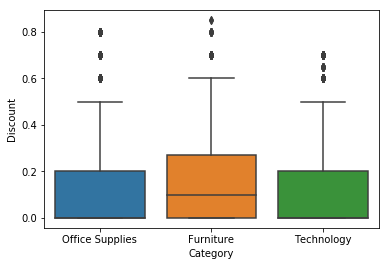

In [826]:
sns.boxplot(x="Category", y ="Discount", data=data)

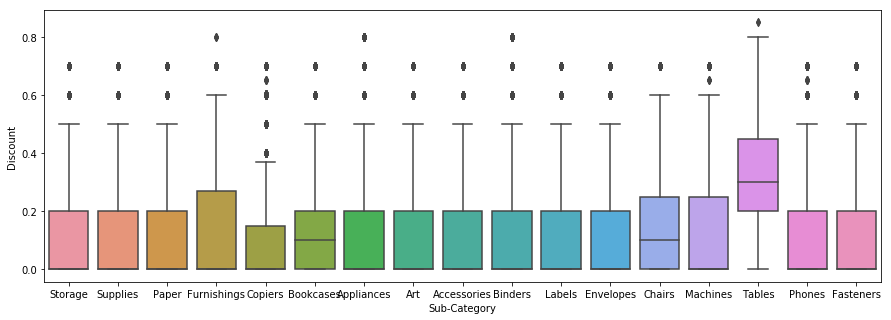

In [827]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Sub-Category", y ="Discount", data=data)

In [828]:
data.groupby("Sub-Category")["Sales"].describe().T

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
count,3075.000000,1755.000000,4883.000000,6152.000000,2411.000000,3434.000000,2223.000000,2435.000000,2420.000000,3170.000000,2606.000000,1486.000000,3538.000000,3357.000000,5059.000000,2425.000000,861.000000
mean,243.654315,576.105017,76.201508,75.083145,608.283800,437.298126,679.008670,70.186571,34.397651,121.633519,28.167318,524.266532,69.047970,508.437337,222.788271,100.236792,879.258913
std,327.224414,797.062788,82.005215,288.540052,602.487519,535.097949,821.101085,69.690043,28.867397,145.605989,34.155510,928.000994,74.444859,717.305475,292.078362,271.248824,796.402495
min,0.990000,0.444000,1.344000,0.556000,35.490000,13.545000,35.460000,1.632000,1.240000,1.892000,1.668000,11.511000,3.380000,2.970000,2.799000,1.744000,24.368000
25%,67.572000,93.915000,22.960000,12.720000,230.272000,132.720000,264.848400,24.464000,14.560000,34.200000,11.280000,136.636875,21.283650,135.960000,48.384000,35.520000,330.588000
50%,132.500000,248.856000,49.842000,28.107000,411.332000,258.000000,487.380000,47.640000,26.122000,73.312500,20.645000,305.145000,43.968000,273.300000,113.568000,62.802000,629.064000
75%,274.527900,711.250000,100.126800,63.195000,755.092500,517.461750,811.438410,91.590000,45.007200,151.680000,35.876250,621.180000,89.568000,556.100000,269.425000,111.120000,1114.272000
max,3449.880000,7958.580000,1113.024000,9892.740000,5667.870000,5759.964000,17499.950000,604.656000,271.320000,1519.140000,786.480000,22638.480000,733.950000,6998.640000,2962.680000,8187.650000,5451.300000


In [829]:
data.groupby("Sub-Category")["Profit"].describe().T

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
count,3075.000000,1755.000000,4883.000000,6152.000000,2411.000000,3434.000000,2223.000000,2435.000000,2420.000000,3170.000000,2606.000000,1486.000000,3538.000000,3357.000000,5059.000000,2425.000000,861.000000
mean,42.154896,80.729681,11.868505,11.776633,67.160688,40.884178,116.314687,12.156516,4.762572,14.816223,5.759982,39.614989,16.734789,64.556749,21.439314,9.312686,-74.429023
std,126.787072,302.596743,32.199936,153.960611,242.859457,180.977823,365.093054,31.608325,14.180009,56.166072,16.190922,347.491558,32.307508,251.666470,93.922868,44.851356,402.973963
min,-1345.500000,-3059.820000,-371.232000,-3701.892800,-1981.395000,-2211.165000,-1672.500000,-173.292000,-121.296000,-446.400000,-63.540000,-6599.978000,-191.466000,-4088.376000,-800.064000,-1049.340600,-2750.280000
25%,1.640000,2.050750,1.050000,0.000000,-17.900000,-13.737075,0.000000,0.540000,-0.070875,-0.061200,0.567750,-19.231875,3.290400,2.190000,-2.193300,0.000000,-205.608000
50%,18.420000,33.364800,7.052000,4.681100,44.970000,20.178000,65.910000,7.487200,3.705000,9.450000,3.960000,28.380000,9.630000,30.720000,8.370000,8.280000,-34.647000
75%,57.592800,114.047900,20.459700,14.470350,136.046250,76.470000,179.730000,20.510000,10.023750,28.557000,9.047700,104.736000,24.300000,93.480000,36.779500,22.500000,103.040000
max,1216.020000,3979.080000,269.220000,4946.370000,2316.510000,1868.130000,8399.976000,279.360000,127.260000,561.960000,385.375200,2799.984000,352.296000,2939.310000,802.170000,327.506000,2071.440000


In [830]:
data.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10)

City
New York City    62036.98370
Los Angeles      30440.75790
Seattle          29156.09670
Managua          17853.71804
San Francisco    17507.38540
London           17378.71500
Sydney           16002.80700
Vienna           15660.84000
San Salvador     15036.51040
Mexico City      13342.29176
Name: Profit, dtype: float64

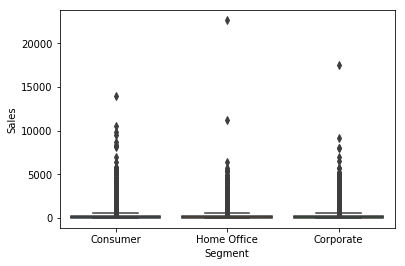

In [831]:
# plt.figure(figsize=(15,5))
sns.boxplot(x="Segment", y ="Sales", data=data)

In [55]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order_year'], data['Order_month'] = data['Order Date'] .dt.year, data['Order Date'] .dt.month


In [94]:
df= data[["Order_year","Order_month","Sales"]]

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 3 columns):
Order_year     51290 non-null int64
Order_month    51290 non-null int64
Sales          51290 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.2 MB


In [96]:
df1=pd.DataFrame(df.groupby(["Order_year","Order_month"])["Sales"].sum())
df1.reset_index(inplace=True)
df1.head()
df1.rename(columns={"Order_year":"Year","Order_month":"Month"}, inplace=True)

In [98]:
df1['Date'] = pd.to_datetime(df1.assign(Day=1).loc[:, ['Year','Month','Day']])
df1.head()

,Year,Month,Sales,Date
0,2011,1,138241.30042,2011-01-01
1,2011,2,134969.94086,2011-02-01
2,2011,3,171455.59372,2011-03-01
3,2011,4,128833.47034,2011-04-01
4,2011,5,148146.72092,2011-05-01


In [99]:
df1.drop(columns=["Year","Month"],inplace=True)

In [104]:
df1.head()

,Sales
Date,
2011-01-01,138241.30042
2011-02-01,134969.94086
2011-03-01,171455.59372
2011-04-01,128833.47034
2011-05-01,148146.72092


In [106]:
# df1.set_index("Date",inplace=True)
ts=df1["Sales"]

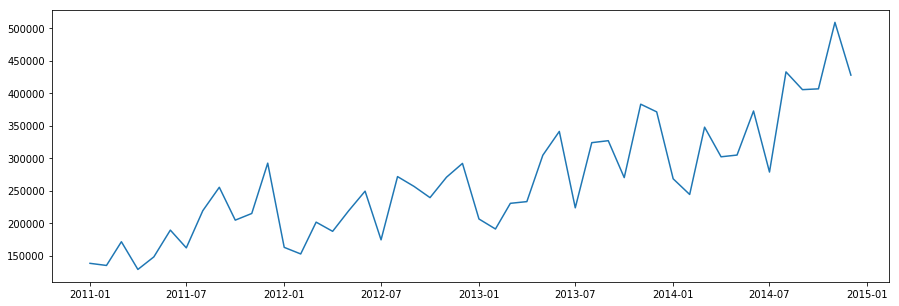

In [110]:
plt.figure(figsize=(15,5))
plt.plot(ts)


## using log transformation -----------------------------------------------

Date
2011-01-01    11.836756
2011-02-01    11.812807
2011-03-01    12.052080
2011-04-01    11.766276
2011-05-01    11.905958
Name: Sales, dtype: float64


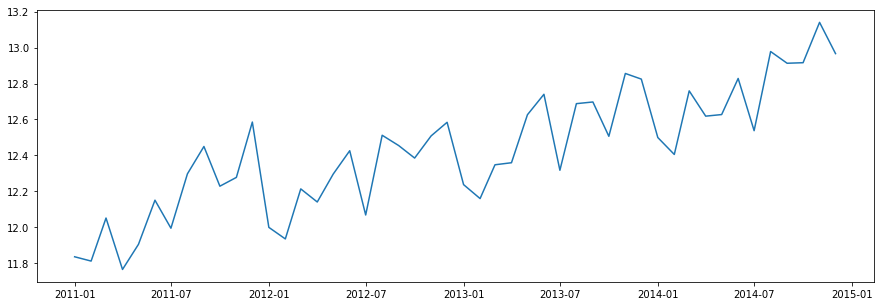

In [118]:
plt.figure(figsize=(15,5))
ts_log = np.log(ts)
print(ts_log.head())
plt.plot(ts_log)

In [130]:
import pandas as pd
moving_average = ts_log.rolling(window=12).mean()

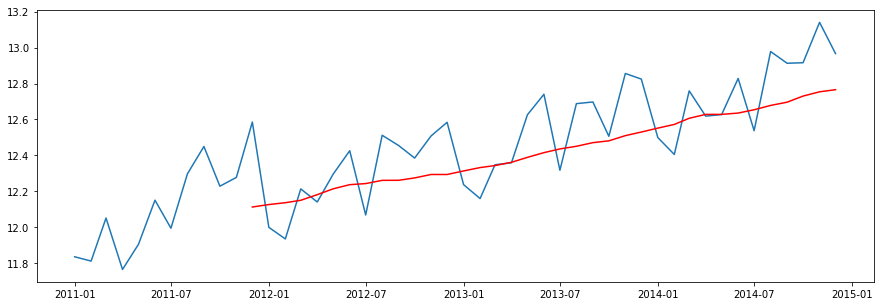

In [131]:
plt.figure(figsize=(15,5))
plt.plot(ts_log)
plt.plot(moving_average,color="r")

In [136]:
ts_after_sub_mov_average=(ts_log-moving_average)
ts_after_sub_mov_average.dropna(inplace=True)
ts_after_sub_mov_average.head()

Date
2011-12-01    0.472279
2012-01-01   -0.126806
2012-02-01   -0.201377
2012-03-01    0.063231
2012-04-01   -0.040738
Name: Sales, dtype: float64

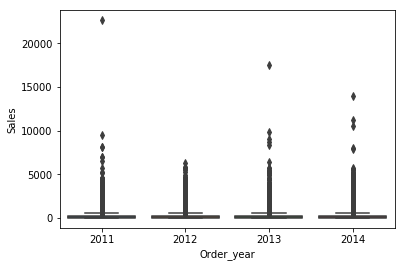

In [833]:
sns.boxplot(x="Order_year", y ="Sales", data=data)

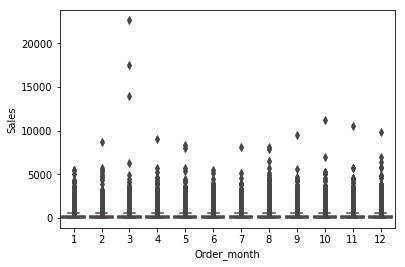

In [834]:
sns.boxplot(x="Order_month", y ="Sales", data=data)

### dropping columns that have redundant or specific information------Generalization- 

In [835]:
data.iloc[:5,:]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_year,Order_month
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,1
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,1
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,1
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,1
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,1


In [836]:
data.drop(columns=["Row ID","Order ID","Order Date","Ship Date","Customer ID","Customer Name"], axis=1, inplace=True)

In [837]:
data.drop(columns=["Product ID","Product Name"], axis=1, inplace=True)

In [838]:
data.Market.unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [839]:
postal_data=data[~(data["Postal Code"].isnull())].groupby("Postal Code")["Sales"].sum().reset_index().sort_values(by="Sales",ascending=False)

In [840]:
postal_data[postal_data.Sales>=10000]


,Postal Code,Sales
54,10024.0,78697.1820
55,10035.0,77357.8850
52,10009.0,54761.4960
578,94122.0,52667.4670
53,10011.0,45551.5980
620,98105.0,41838.0080
621,98115.0,41160.9080
80,19134.0,39390.2930
149,32216.0,39133.3280
519,90049.0,37961.0120


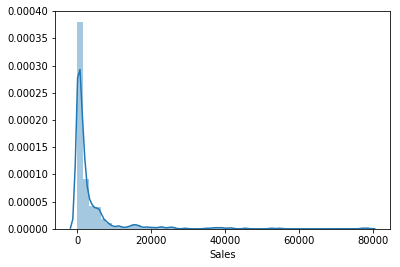

In [841]:
sns.distplot(a=postal_data["Sales"])

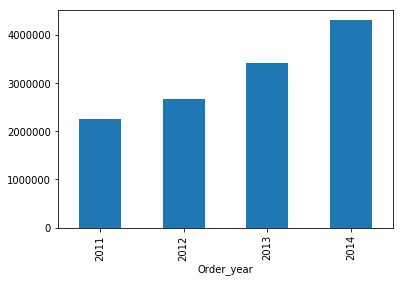

In [842]:
data.groupby("Order_year")["Sales"].sum().plot(kind="bar")

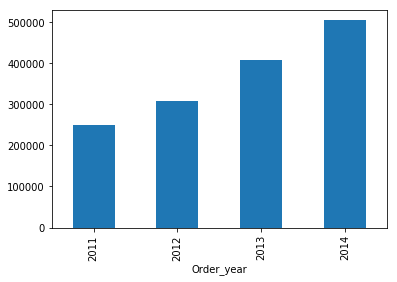

In [843]:
data.groupby("Order_year")["Profit"].sum().plot(kind="bar")

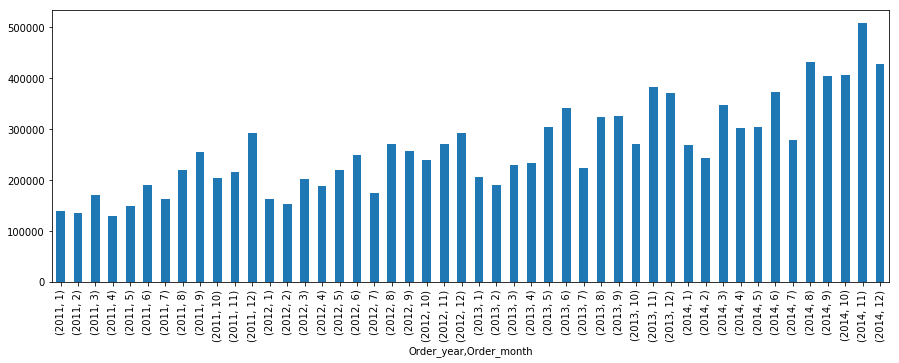

In [844]:
plt.figure(figsize=(15,5))
data.groupby(["Order_year","Order_month"])["Sales"].sum().plot(kind="bar")


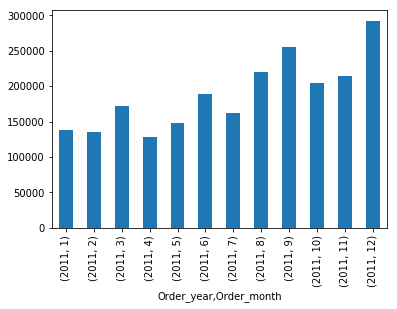

In [845]:
data[data["Order_year"]==2011].groupby(["Order_year","Order_month"])["Sales"].sum().plot(kind="bar")

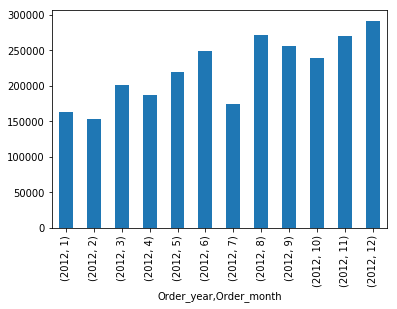

In [846]:
data[data["Order_year"]==2012].groupby(["Order_year","Order_month"])["Sales"].sum().plot(kind="bar")

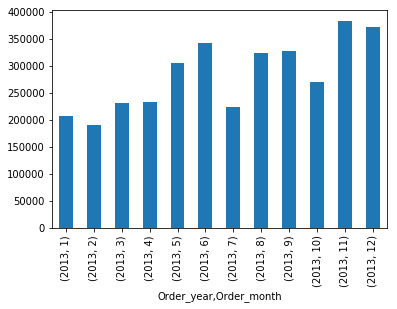

In [847]:
data[data["Order_year"]==2013].groupby(["Order_year","Order_month"])["Sales"].sum().plot(kind="bar")

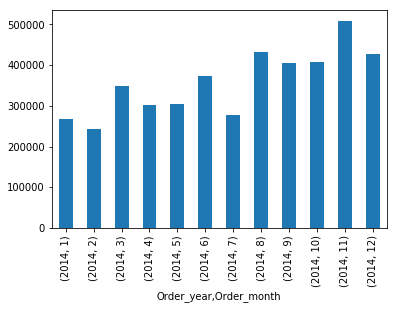

In [848]:
data[data["Order_year"]==2014].groupby(["Order_year","Order_month"])["Sales"].sum().plot(kind="bar")

In [849]:
data.iloc[:5,:]

,Ship Mode,Segment,City,State,Country,Postal Code,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_year,Order_month
0,Standard Class,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,Office Supplies,Storage,408.300,2,0.0,106.140,35.46,Medium,2011,1
1,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,Office Supplies,Supplies,120.366,3,0.1,36.036,9.72,Medium,2011,1
2,Second Class,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,Office Supplies,Storage,66.120,4,0.0,29.640,8.17,High,2011,1
3,Second Class,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,Office Supplies,Paper,44.865,3,0.5,-26.055,4.82,High,2011,1
4,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,Furniture,Furnishings,113.670,5,0.1,37.770,4.70,Medium,2011,1


In [850]:
data.drop(columns="Postal Code", axis=1, inplace=True)

In [851]:
data.Country.unique().size

147

In [852]:
data.Order_month=data.Order_month.astype("category", inplace=True)
data.Order_year=data.Order_year.astype("category", inplace=True)


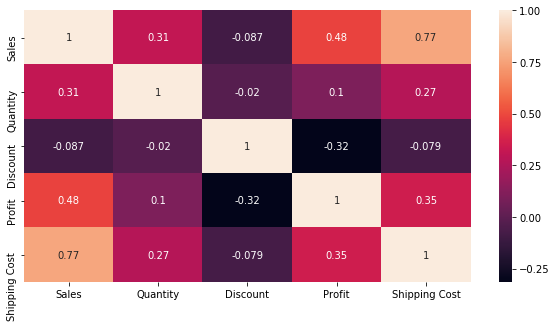

In [859]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

In [ ]:
year =data.groupby()

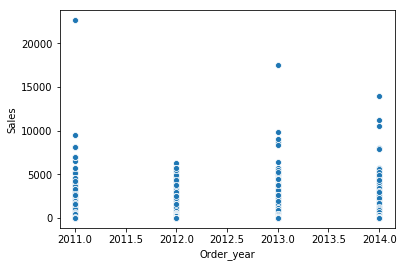

In [860]:
sns.scatterplot(x="Order_year", y="Sales",data=data)

### Statistical Analysis--- 

1. Applying annova- 

In [854]:
import statsmodels.formula.api as statsmodel
from statsmodels.formula.api import ols
import statsmodels.api as sms


## 1.Category impact on SALES- Declaring Hypothesis- 
    Ho: The means of all categories is same. I.e. Sales due to All categories has same impact.
    H1: There is a variance in the impact of Categories on Sales

In [855]:
## Fitting anova model using OLS 
model = ols("Sales ~ Category",data=data).fit()

In [856]:
print(sms.stats.anova_lm(model))

               df        sum_sq       mean_sq           F  PR(>F)
Category      2.0  1.273276e+09  6.366381e+08  2990.27631     0.0
Residual  51287.0  1.091914e+10  2.129028e+05         NaN     NaN


In [857]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [858]:
print(pairwise_tukeyhsd(data["Sales"],
                        data["Category"]))

         Multiple Comparison of Means - Tukey HSD,FWER=0.05        
     group1          group2      meandiff   lower    upper   reject
-------------------------------------------------------------------
   Furniture    Office Supplies -295.1518 -307.6345 -282.669  True 
   Furniture       Technology     51.61    36.3212  66.8989   True 
Office Supplies    Technology    346.7618  334.4036  359.12   True 
-------------------------------------------------------------------


#### This means that, we should Reject our Null Hypothesis. The Categories do have a significant impact on Sales as expect actually. 
     From Tukeytest it can be said that the highest impact on Sales is due to- Office Supplies. 

## 2.Market impact on SALES- Declaring Hypothesis- 
    Ho: The means of all Market is same. i.e. Salesin all markets is same impact.
    H1: There is a variance in the impact of Market on Sales

In [568]:
data.rename(columns={"Sub-Category": "Sub_Category"}, inplace=True)

In [573]:
## Fitting anova model using OLS 
model_market = ols("Sales ~ Market",data=data).fit()

In [574]:
print(sms.stats.anova_lm(model_market))

               df        sum_sq       mean_sq        F         PR(>F)
Market        6.0  1.736521e+08  2.894202e+07  123.493  1.204270e-155
Residual  51283.0  1.201877e+10  2.343616e+05      NaN            NaN


In [575]:
print(pairwise_tukeyhsd(data["Sales"],
                        data["Market"]))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
 APAC  Africa -155.0491 -180.1356 -129.9627  True 
 APAC  Canada -151.6254 -225.7247  -77.526   True 
 APAC   EMEA   -165.615 -189.9109  -141.319  True 
 APAC    EU    -32.1086  -51.8294  -12.3878  True 
 APAC  LATAM  -115.6391 -135.2119  -96.0664  True 
 APAC    US    -96.0595 -115.7834  -76.3356  True 
Africa Canada   3.4237   -72.4029  79.2504  False 
Africa  EMEA   -10.5659  -39.7081  18.5763  False 
Africa   EU    122.9405   97.487   148.3941  True 
Africa LATAM    39.41    14.0709    64.749   True 
Africa   US    58.9896   33.5337   84.4456   True 
Canada  EMEA   -13.9896  -89.5584  61.5792  False 
Canada   EU    119.5168  45.2924   193.7412  True 
Canada LATAM   35.9862   -38.199   110.1714 False 
Canada   US    55.5659   -18.6594  129.7911 False 
 EMEA    EU    133.5064  108.8316  158.1812  True 
 EMEA  LATAM   49.9758   25.419

## Observations- 
APAC mean is lower than every other market.
The SALES of Market is in the following order

EMEA>Africa>=Canada>LATAM>US>EU> APAC

## -------------------------------------------------------------------------------------------------------------

## 3.Segment impact on SALES- Declaring Hypothesis- 
    Ho: The means of all Segments is same. i.e. Sales in all Segments has same impact.
    H1: There is a variance in the impact of Segmments on Sales

In [577]:
## Fitting anova model using OLS 
model_Segment = ols("Sales ~ Segment",data=data).fit()

In [578]:
print(sms.stats.anova_lm(model_market))

               df        sum_sq        mean_sq         F    PR(>F)
Segment       2.0  6.591343e+04   32956.715346  0.138632  0.870549
Residual  51287.0  1.219235e+10  237727.965794       NaN       NaN


In [579]:
print(pairwise_tukeyhsd(data["Sales"],
                        data["Segment"]))

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
  group1     group2   meandiff  lower    upper  reject
------------------------------------------------------
 Consumer  Corporate   2.4739   -9.097  14.0448 False 
 Consumer Home Office  1.8121  -11.9363 15.5605 False 
Corporate Home Office -0.6618  -15.6422 14.3187 False 
------------------------------------------------------


## Observation - 

The mean Sales value for all the 3 Segments is same. 

## 4.Year impact on SALES- Declaring Hypothesis- 
    Ho: The means of all Year is same. i.e. Sales in all Years has same impact.
    H1: There is a variance in the impact of year on Sales

In [580]:
## Fitting anova model using OLS 
model_Year = ols("Sales ~ Order_year",data=data).fit()

In [581]:
print(sms.stats.anova_lm(model_Year))

                 df        sum_sq        mean_sq         F    PR(>F)
Order_year      3.0  2.742773e+05   91425.764573  0.384581  0.764119
Residual    51286.0  1.219215e+10  237728.538350       NaN       NaN


In [582]:
print(pairwise_tukeyhsd(data["Sales"],
                        data["Order_year"]))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
 2011   2012  -6.8586  -24.6777 10.9604 False 
 2011   2013  -4.2948  -21.268  12.6784 False 
 2011   2014  -5.8338  -22.0782 10.4107 False 
 2012   2013   2.5638  -13.4626 18.5903 False 
 2012   2014   1.0249  -14.2277 16.2774 False 
 2013   2014   -1.539  -15.7942 12.7163 False 
----------------------------------------------


## Observation-
     No Significant impact of a particular year on Sales-

## --------------------------------------------------------------------------------------------------

In [613]:
### Analysising month vise data- 
data_2014=data[data["Order_year"]==2014]

In [614]:
## Fitting anova model using OLS 
model_month = ols("Sales ~ Order_month",data=data_2014).fit()

In [615]:
print(sms.stats.anova_lm(model_month))

                  df        sum_sq        mean_sq         F    PR(>F)
Order_month     11.0  2.728994e+06  248090.407711  1.087552  0.366502
Residual     17519.0  3.996403e+09  228118.223459       NaN       NaN


### Checked for each month of every year, the mean of the months is same. No significant impact of any particular month on Sales.

# Applying Simple Linear Regression on Year and Sales-------

In [616]:
# SCIKIT LEARN- dedicated library from ML. 
from sklearn.linear_model import LinearRegression

In [668]:
data.head()

,Ship Mode,Segment,Market,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_year,Order_month
0,4,Consumer,Africa,Office Supplies,Storage,408.300,2,0.0,106.140,35.46,3,2011,1
1,4,Consumer,APAC,Office Supplies,Supplies,120.366,3,0.1,36.036,9.72,3,2011,1
2,3,Consumer,EMEA,Office Supplies,Storage,66.120,4,0.0,29.640,8.17,2,2011,1
3,3,Home Office,EU,Office Supplies,Paper,44.865,3,0.5,-26.055,4.82,2,2011,1
4,4,Consumer,APAC,Furniture,Furnishings,113.670,5,0.1,37.770,4.70,3,2011,1


In [699]:
data.drop(columns={"City","State","Country","Region"}, inplace=True)        ###done and dusted

In [700]:
data["Ship Mode"].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [660]:
## Manual Label encoding- 

In [701]:
data["Ship Mode"]=data["Ship Mode"].map({'Standard Class':4, 'Second Class':3, 'First Class':2, 'Same Day':1})

In [703]:
data["Order Priority"].unique()

array([3, 2, 1, 4], dtype=int64)

In [702]:
data["Order Priority"]=data["Order Priority"].map({ 'Critical':1, 'High':2,'Medium':3, 'Low':4})
data["Order_year"]=data["Order_year"].map({2011:1,2012:2,2013:3,2014:4})

In [704]:
data["Order_month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [705]:
data["Order_month"]=data["Order_month"].map({1:1, 2:2, 3:3, 4:4, 5:5,6:6,7:7, 8:8, 9:9, 10:10, 11:11, 12:12})


## One-hot encoding-----------------------------------------------------

In [709]:
dummytrain=pd.get_dummies(data)
dummytrain.shape[1]

39

In [710]:
dummytrain.columns

Index(['Ship Mode', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Order_year', 'Order_month', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office', 'Market_APAC',
       'Market_Africa', 'Market_Canada', 'Market_EMEA', 'Market_EU',
       'Market_LATAM', 'Market_US', 'Category_Furniture',
       'Category_Office Supplies', 'Category_Technology',
       'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper',
       'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables'],
      dtype='object')

In [680]:
from sklearn.preprocessing import StandardScaler

In [681]:
ss =StandardScaler()

In [743]:
scaled_data=pd.DataFrame(ss.fit_transform(dummytrain), columns=dummytrain.columns)   

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [744]:
scaled_data.head()

,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_year,Order_month,Segment_Consumer,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0.712843,0.331875,-0.647964,-0.673210,0.444702,0.158546,0.583603,-1.617231,-1.809701,0.966518,...,-0.223252,-0.222529,-0.256665,-0.231363,-0.172734,-0.272197,-0.264642,3.022973,-0.222770,-0.130666
1,0.712843,-0.258685,-0.209126,-0.202129,0.042589,-0.290698,0.583603,-1.617231,-1.809701,0.966518,...,-0.223252,-0.222529,-0.256665,-0.231363,-0.172734,-0.272197,-0.264642,-0.330800,4.488933,-0.130666
2,-0.381098,-0.369945,0.229712,-0.673210,0.005902,-0.317751,-0.845794,-1.617231,-1.809701,0.966518,...,-0.223252,-0.222529,-0.256665,-0.231363,-0.172734,-0.272197,-0.264642,3.022973,-0.222770,-0.130666
3,-0.381098,-0.413540,-0.209126,1.682194,-0.313561,-0.376219,-0.845794,-1.617231,-1.809701,-1.034641,...,-0.223252,-0.222529,-0.256665,-0.231363,-0.172734,3.673811,-0.264642,-0.330800,-0.222770,-0.130666
4,0.712843,-0.272419,0.668550,-0.202129,0.052536,-0.378313,0.583603,-1.617231,-1.809701,0.966518,...,-0.223252,-0.222529,3.896128,-0.231363,-0.172734,-0.272197,-0.264642,-0.330800,-0.222770,-0.130666


In [729]:
scaled_data.drop("Profit",inplace=True, axis=1)

## Applying LR--------------------------------------------------------------------------------------

In [745]:
## Splitting data into train and test- 
from sklearn.model_selection import train_test_split

x=scaled_data.drop("Sales",axis=1)
y=scaled_data["Sales"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [746]:
from sklearn.linear_model import LinearRegression

In [747]:
lr=LinearRegression()

In [748]:
predicted_Sales=lr.fit(xtrain,ytrain).predict(xtest)

In [749]:
### R Square and RMSE 

from sklearn.metrics import r2_score,mean_squared_error

In [750]:
r2_score(ytest,predicted_Sales)

0.6324882177812627

In [751]:
import numpy as np
np.sqrt(mean_squared_error(ytest,predicted_Sales))  

0.667166762806446

### Applying Statistical model------------------------------------

In [752]:
import statsmodels.formula.api as smf

In [753]:
xtrain["constant"]=1

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [754]:
model = smf.OLS(endog=ytrain, exog=xtrain).fit()

In [775]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     3885.
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:55:56   Log-Likelihood:                -25202.
No. Observations:               35903   AIC:                         5.046e+04
Df Residuals:                   35876   BIC:                         5.069e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Ship Mode                    0.0484      0.003     16.517      0.000       0.043       0.054
Quantity                     0.1328      0.003     47.351      0.000       0.127       0.138
Discount                     0.0315      0.003     11.369      0.000       0.026       0.037
Profit                       0.2701      0.003     86.797      0.000       0.264       0.276
Shipping Cost                0.5658      0.003    170.763      0.000       0.559       0.572
Order Priority               0.0726      0.003     24.588      0.000       0.067       0.078
Market_APAC                  0.0071      0.003      2.071      0.038       0.000       0.014
Market_EU                    0.0099      0.003      2.958      0.003       0.003       0.017
Market_LATAM                -0.0246      0.003     -7.234      0.000      -0.031      -0.018
Market_US                   -0.0160      0.003     -4.698      0.000      -0.023      -0.009
Category_Furniture           0.0283      0.001     26.433      0.000       0.026       0.030
Category_Office Supplies    -0.0442      0.001    -45.460      0.000      -0.046      -0.042
Category_Technology          0.0261      0.001     24.439      0.000       0.024       0.028
Sub-Category_Accessories    -0.0295      0.002    -13.643      0.000      -0.034      -0.025
Sub-Category_Appliances      0.0640      0.002     25.624      0.000       0.059       0.069
Sub-Category_Art            -0.0232      0.002    -10.130      0.000      -0.028      -0.019
Sub-Category_Binders        -0.0285      0.002    -12.908      0.000      -0.033      -0.024
Sub-Category_Bookcases       0.0430      0.002     19.056      0.000       0.039       0.047
Sub-Category_Chairs          0.0134      0.002      6.395      0.000       0.009       0.018
Sub-Category_Copiers         0.0396      0.002     17.298      0.000       0.035       0.044
Sub-Category_Envelopes      -0.0172      0.002     -7.135      0.000      -0.022      -0.012
Sub-Category_Fasteners      -0.0239      0.002     -9.818      0.000      -0.029      -0.019
Sub-Category_Furnishings    -0.0488      0.002    -22.493      0.000      -0.053      -0.045
Sub-Category_Labels         -0.0261      0.002    -10.863      0.000      -0.031      -0.021
Sub-Category_Machines        0.0191      0.002      8.058      0.000       0.014       0.024
Sub-Category_Paper          -0.0220      0.002     -9.121      0.000      -0.027      -0.017
Sub-Category_Phones          0.0248      0.002     11.610      0.000       0.021       0.029
Sub-Category_Storage         0.0162      0.002      7.103      0.000       0.012       0.021
Sub-Category_Supplies       -0.0088      0.002     -3.618      0.000      -0.014      -0.004
Sub-Category_Tables          0.0813      0.003     32.268      0.000       0.076       0.086
constant      

In [774]:
model = smf.OLS(endog=ytrain, exog=xtrain.drop(["Order_year","Order_month","Segment_Home Office","Segment_Corporate","Segment_Consumer","Market_EMEA","Market_Africa","Market_Canada"],axis=1)).fit()

### Checking assumptions-----------------------------------------------------

1. Residual pattern test---------

In [776]:
residual = ytest-predicted_Sales

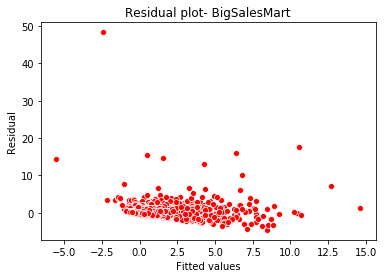

In [778]:
sns.scatterplot(predicted_Sales,residual,color="r")
plt.xlabel("Fitted values")
plt.ylabel("Residual")
plt.title("Residual plot- BigSalesMart")
plt.show()

NO PATTERN---------------PASSED

2. Normality test-

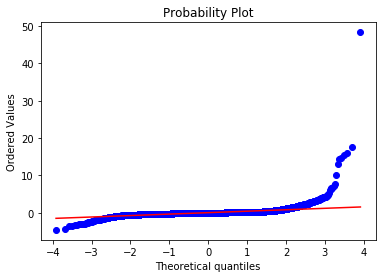

In [779]:
import pylab
stats.probplot(residual,plot=pylab)
plt.show()

In [780]:
from scipy.stats import shapiro

In [781]:
teststats,pvalue=shapiro(residual)

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [782]:
print(round(pvalue,2))

0.0


3. Multicollinearity test-------------------

In [783]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [784]:
scaled_data["constant"]=1

In [785]:
vif=[variance_inflation_factor(scaled_data.values,i) for i in range(scaled_data.shape[1])]
pd.DataFrame({"vif": vif[0:]}, index= scaled_data.columns).T

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_year,Order_month,Segment_Consumer,...,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,constant
vif,1.299665,3.335368,1.236978,1.156518,1.516577,2.734205,1.328559,1.001701,1.002364,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,1.0


passed-----------------------------------------------

## Heteroscedastic----------------------

In [790]:
import statsmodels.stats.api as sms

In [791]:
sms.het_goldfeldquandt(residual,xtest) 

(0.3871505848134676, 0.9999999999999999, 'increasing')

# FAILED

## Autocorrelation---------------------------------------------------

In [792]:
sms.stattools.durbin_watson(residual, axis=0)

1.9978937017153173

## Linearity-----------------------------------------------------------

In [793]:
import statsmodels.api as sma
sma.stats.diagnostic.linear_rainbow(model)

(1.1400954315604883, 8.4186976461119e-19)

## ---------------------------------------------------------------------------------------------------------------------------

In [25]:
data.iloc[:10,:15]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture
5,22254,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-PA-10001968,Office Supplies
6,21613,IN-2011-30733,1/2/2011,3/2/2011,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,Bangladesh,APAC,Central Asia,TEC-CO-10002316,Technology
7,34662,CA-2011-115161,1/2/2011,3/2/2011,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,United States,US,West,FUR-BO-10003966,Furniture
8,44508,AO-2011-1390,1/2/2011,4/2/2011,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,Angola,Africa,Africa,OFF-FEL-10001541,Office Supplies
9,23688,ID-2011-56493,1/2/2011,3/2/2011,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,China,APAC,North Asia,OFF-ST-10002161,Office Supplies


In [24]:
data["Order ID"].astype(str).str[:2].unique()

array(['AG', 'IN', 'HU', 'IT', 'CA', 'AO', 'ID', 'US', 'IR', 'ES', 'UP',
       'NI', 'MX', 'TU', 'PL', 'SO', 'SU', 'LO', 'EG', 'SA', 'CG', 'KE',
       'TZ', 'MO', 'AL', 'PU', 'IZ', 'GH', 'IV', 'AU', 'MA', 'RS', 'SF',
       'BK', 'RO', 'IS', 'BY', 'CM', 'SG', 'GG', 'KZ', 'AE', 'LI', 'EZ',
       'BN', 'RW', 'QA', 'BU', 'MZ', 'LE', 'UZ', 'MD', 'GV', 'AJ', 'ZA',
       'UG', 'TO', 'ZI', 'BO', 'LY', 'LH', 'CF', 'TS', 'TX', 'YM', 'KG',
       'HR', 'ML', 'WA', 'SY', 'SL', 'GB', 'MR', 'NG', 'DJ', 'JO', 'EK',
       'MG', 'ER', 'SI', 'ET', 'TI', 'MW', 'CT', 'LT', 'CD', 'AM', 'WZ',
       'EN', 'OD', 'BA', 'MK'], dtype=object)

In [28]:
data.iloc[:5,15:]

,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [18]:
data["Customer ID"].unique().size

1590

In [19]:
## Converting this data into our customer segmentation format-----------------------------

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null datetime64[ns]
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping Cost     51290 non-null float64
O

In [24]:
## droping postal code for now------------------------

In [3]:
data.drop("Postal Code",1,inplace=True)

In [4]:
data["Product Name"].value_counts()

Staples                                                                                227
Cardinal Index Tab, Clear                                                               92
Eldon File Cart, Single Width                                                           90
Rogers File Cart, Single Width                                                          84
Ibico Index Tab, Clear                                                                  83
Sanford Pencil Sharpener, Water Color                                                   80
Smead File Cart, Single Width                                                           77
Stanley Pencil Sharpener, Water Color                                                   75
Acco Index Tab, Clear                                                                   75
Avery Index Tab, Clear                                                                  74
Tenex File Cart, Single Width                                                           70

In [31]:
data[data["Product Name"]=="Staples"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
300,37193,CA-2011-168305,2011-01-11,8/11/2011,Standard Class,PL-18925,Paul Lucas,Home Office,Los Angeles,California,...,OFF-PA-10004947,Office Supplies,Paper,Staples,21.400,5,0.0,9.6300,0.92,Medium
303,35362,CA-2011-102673,2011-01-11,5/11/2011,Standard Class,KH-16630,Ken Heidel,Corporate,Charlotte,North Carolina,...,OFF-FA-10003021,Office Supplies,Fasteners,Staples,7.520,5,0.2,1.4100,0.33,Medium
389,37354,CA-2011-107524,2011-02-03,8/3/2011,Standard Class,KN-16705,Kristina Nunn,Home Office,New York City,New York,...,OFF-EN-10001990,Office Supplies,Envelopes,Staples,11.360,2,0.0,5.3392,0.94,Medium
567,36227,US-2011-138828,2011-02-09,3/9/2011,First Class,KD-16345,Katherine Ducich,Consumer,New York City,New York,...,OFF-PA-10000349,Office Supplies,Paper,Staples,14.940,3,0.0,7.0218,4.15,Critical
587,34520,CA-2011-108189,2011-02-10,5/10/2011,First Class,ES-14080,Erin Smith,Corporate,Tempe,Arizona,...,OFF-FA-10000735,Office Supplies,Fasteners,Staples,4.672,2,0.2,1.4600,1.32,High
672,37548,CA-2011-101147,2011-02-12,4/12/2011,First Class,MC-17575,Matt Collins,Consumer,Chicago,Illinois,...,OFF-AP-10004249,Office Supplies,Appliances,Staples,2.394,1,0.8,-6.3441,0.23,High
699,33000,CA-2011-139857,2011-03-02,7/2/2011,Standard Class,CD-12790,Cynthia Delaney,Home Office,San Diego,California,...,OFF-FA-10001843,Office Supplies,Fasteners,Staples,12.350,5,0.0,5.8045,0.29,Medium
740,41180,CA-2011-112291,2011-03-04,8/4/2011,Standard Class,KE-16420,Katrina Edelman,Corporate,Los Angeles,California,...,OFF-EN-10001415,Office Supplies,Envelopes,Staples,11.160,2,0.0,5.5800,0.24,Medium
864,32154,CA-2011-125612,2011-03-08,8/8/2011,Standard Class,BK-11260,Berenike Kampe,Consumer,New York City,New York,...,OFF-ST-10003221,Office Supplies,Storage,Staples,21.360,2,0.0,5.7672,1.39,Medium
1106,33171,CA-2011-147914,2011-04-06,9/6/2011,Standard Class,MP-17470,Mark Packer,Home Office,Columbus,Ohio,...,OFF-PA-10001685,Office Supplies,Paper,Staples,16.224,2,0.2,5.8812,0.57,Medium


In [85]:
customer_database.shape

(1590, 1)

In [54]:
Customer_base=pd.DataFrame(data.groupby("Customer ID")["Customer Name"].value_counts()).rename(columns={"Customer Name":"count"}).reset_index().iloc[:,0:2]

In [6]:
## Working on the columns Recency------------------------------------------------------------------------------

In [55]:
data["Order Date"].max()-data["Order Date"].min()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
data["Order Date"].max()

In [ ]:
# data.info()
## trying
(pd.datetime(2015,1,1)-pd.to_datetime(data["Order Date"].max())).days

In [ ]:
(pd.datetime(2015,1,1) - pd.to_datetime(data['Order Date'])).dt.days

In [56]:
data['Recency'] = (pd.datetime(2015,1,1) - pd.to_datetime(data['Order Date'])).dt.days

In [57]:
Recency_cust = data.groupby('Customer ID', as_index=False).agg({'Recency':'min'})
Recency_cust.head()

,Customer ID,Recency
0,AA-10315,9
1,AA-10375,7
2,AA-10480,118
3,AA-10645,27
4,AA-315,3


In [58]:
Customer_base.head()
# Customer_base[Customer_base["Recency"]==1]

,Customer ID,Customer Name
0,AA-10315,Alex Avila
1,AA-10375,Allen Armold
2,AA-10480,Andrew Allen
3,AA-10645,Anna Andreadi
4,AA-315,Alex Avila


In [59]:
Customer_base=Customer_base.merge(Recency_cust,on="Customer ID")

In [60]:
Customer_base.shape

(1590, 3)

In [61]:
Customer_base.sort_values(by="Recency").head(10)

,Customer ID,Customer Name,Recency
208,BS-11365,Bill Shonely,1
733,JG-15805,John Grady,1
627,GT-4755,Guy Thornton,1
1495,TD-20995,Tamara Dahlen,1
1493,TC-21535,Tracy Collins,1
1171,PB-9105,Peter Bühler,1
1207,PO-18865,Patrick O'Donnell,1
702,JD-16150,Justin Deggeller,1
556,ES-14020,Erica Smith,1
1449,SV-20935,Susan Vittorini,1


In [16]:
## Working on frequency----------------------------------------

In [26]:
data["Quantity"].unique()

array([ 2,  3,  4,  5,  1,  6,  8,  7,  9, 12, 14, 11, 10, 13],
      dtype=int64)

In [62]:
frequency_cust = data.groupby('Customer ID', as_index=False).agg({'Order ID':'count'}).rename(columns={"Order ID":"Frequency"})

In [63]:
frequency_cust.head()

,Customer ID,Frequency
0,AA-10315,42
1,AA-10375,42
2,AA-10480,38
3,AA-10645,73
4,AA-315,8


In [64]:
Customer_base=Customer_base.merge(frequency_cust,on="Customer ID")

In [65]:
# Customer_base.drop("Order ID",1,inplace=True)
Customer_base.head()

,Customer ID,Customer Name,Recency,Frequency
0,AA-10315,Alex Avila,9,42
1,AA-10375,Allen Armold,7,42
2,AA-10480,Andrew Allen,118,38
3,AA-10645,Anna Andreadi,27,73
4,AA-315,Alex Avila,3,8


In [42]:
## Monetory value of customer ----------------------------------------------------------------------------------

In [66]:
Monetary_value_cust = data.groupby('Customer ID', as_index=False).agg({'Profit':'sum'}).rename(columns={"Profit":"Monetary_Value"})

In [67]:
Monetary_value_cust.head()

,Customer ID,Monetary_Value
0,AA-10315,447.69050
1,AA-10375,677.47740
2,AA-10480,1516.47518
3,AA-10645,3051.43900
4,AA-315,535.56600


In [68]:
Customer_base=Customer_base.merge(Monetary_value_cust,on="Customer ID")


,Customer ID,Customer Name,Recency,Frequency,Monetary_Value
0,AA-10315,Alex Avila,9,42,447.69050
1,AA-10375,Allen Armold,7,42,677.47740
2,AA-10480,Andrew Allen,118,38,1516.47518
3,AA-10645,Anna Andreadi,27,73,3051.43900
4,AA-315,Alex Avila,3,8,535.56600


In [69]:
Customer_base.head()

,Customer ID,Customer Name,Recency,Frequency,Monetary_Value
0,AA-10315,Alex Avila,9,42,447.69050
1,AA-10375,Allen Armold,7,42,677.47740
2,AA-10480,Andrew Allen,118,38,1516.47518
3,AA-10645,Anna Andreadi,27,73,3051.43900
4,AA-315,Alex Avila,3,8,535.56600


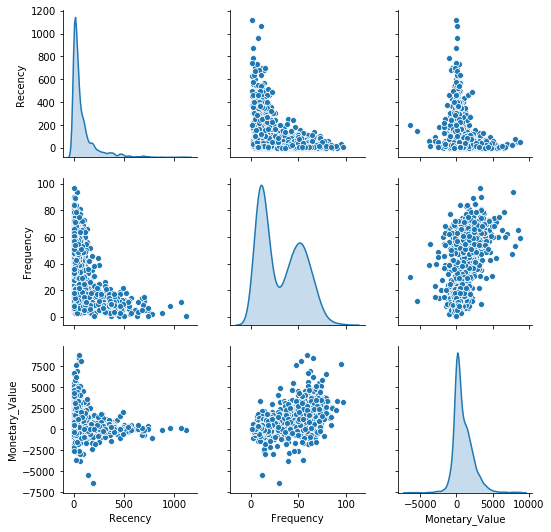

In [71]:
sns.pairplot(Customer_base[["Recency","Frequency","Monetary_Value"]], diag_kind="kde")